# 상관분석

* internal_metrics() 이상치를 한번 파악하려고 봤더니 상자그림이 이상하게 그려졌다. 25
* knob 이상치 제거할 필요 없다. 랜덤생성했기 때문에 14 (+ 범주형은 10개)

1. 데이터 전처리
2. 상관분석 함수
3. activedefrag 있는 경우
4. 전체 knob
5. activedefrag 없는 경우
6. pointbeir~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cluster0 =[ 
'used_memory_rss',
'used_memory_rss_human',
'rss_overhead_ratio',
'rss_overhead_bytes',
'mem_fragmentation_ratio',
'mem_fragmentation_bytes']

cluster1 = [
    'uptime_in_seconds',
    'hz',
    'lru_clock',
    'used_memory_peak',
    'maxmemory',
    'maxmemory_human',
    'rdb_last_save_time',
    'total_net_output_bytes',
    'used_cpu_sys',
    'used_cpu_user'
]

cluster2 = [
    'allocator_allocated',
    'allocator_active',
    'allocator_frag_bytes',
    'instantaneous_ops_per_sec',
    'instantaneous_input_kbps',
    'instantaneous_output_kbps'
]

cluster3 = [
    'allocator_resident',
    'allocator_rss_ratio',
    'allocator_rss_bytes'  
]

knob_list = [
    "save0_0",
    "save0_1",
    "save1_0",
    "save1_1",
    "save2_0",
    "save2_1",

    "rdbcompression",
    "rdbchecksum",
    "rdb-save-incremental-fsync",

    "activedefrag",
    "active-defrag-threshold-lower",
    "active-defrag-threshold-upper",
    "active-defrag-cycle-min",
    "active-defrag-cycle-max",
    
    "maxmemory",
    
    "maxmemory-policy",
    "maxmemory-samples",
    "lazyfree-lazy-eviction",
    "lazyfree-lazy-expire",
    "lazyfree-lazy-server-del",

    "hash-max-ziplist-entries", 
    "hash-max-ziplist-value",
    "activerehashing",
    "hz",
    "dynamic-hz",
    
#     'activedefrag'
]

activedefrag_knobs = [
    "activedefrag",
    "active-defrag-threshold-lower",
    "active-defrag-threshold-upper",
    "active-defrag-cycle-min",
    "active-defrag-cycle-max",
]

In [3]:
# 데이터 불러오기 internal metrics와 knob들의 상관관계분석
# internal_csv = pd.read_csv('./data/internal_metrcis0.csv')
internal_csv = pd.read_csv('./data/internal_metrics5.csv')

In [4]:
# 데이터 불러오기 knob_list
# knobs = pd.read_csv('./data/result_config0.csv')
knobs = pd.read_csv('./data/result_config5.csv')
# knobs['activedefrag'].fillna(value='no', inplace=True)  # activedefrag no 채우기

In [5]:
# 컬럼 추출 함수
def extract_data(cluster_list, df):
    extracted_df = pd.DataFrame()
    for elem in cluster_list:
        extracted_df[elem] = df[elem]

    return extracted_df    

## 데이터 전처리

In [6]:
# 클러스터 합치기
cluster = cluster0+cluster1+cluster2+cluster3

In [7]:
# 클러스터 요소에 해당되는 metrics 25개 추출
total_internal_df = extract_data(cluster, internal_csv)

In [8]:
# throughput 결측치 제거
total_internal_df.dropna()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,42024960,40.08,1.00,-184320,1.09,3402352,28,11,3668563,38704616,...,4.884932,38655872,38920192,264320,16060,1121.38,79.90,42209280,1.08,3289088
1,42024960,40.08,1.00,-184320,1.09,3402352,28,34,3668604,38704632,...,4.937450,38658328,38932480,274152,28139,1964.82,139.72,42209280,1.08,3276800
2,41799680,39.86,0.99,-397312,1.08,3177072,28,3,3668639,38704616,...,4.774636,38655584,38920192,264608,39006,2723.66,193.47,42196992,1.08,3276800
3,42041344,40.09,1.00,-167936,1.09,3418736,28,26,3668673,38704616,...,5.038324,38655856,38920192,264336,16262,1135.51,81.10,42209280,1.08,3289088
4,42049536,40.10,0.95,-2260992,1.09,3426928,28,22,3668707,38704616,...,4.859807,38655744,38920192,264448,16797,1172.88,83.55,44310528,1.14,5390336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,42020864,40.07,0.95,-2289664,1.09,3398256,28,22,3742679,38704616,...,4.959740,38656320,38920192,263872,22815,1593.08,113.37,44310528,1.14,5390336
1696,42016768,40.07,1.00,-192512,1.09,3394160,28,24,3742714,38704616,...,4.985621,38657928,38932480,274552,17227,1202.90,85.79,42209280,1.08,3276800
1697,42065920,40.12,0.95,-2244608,1.09,3443312,28,22,3742748,38704616,...,4.835025,38657928,38932480,274552,19414,1355.54,96.31,44310528,1.14,5378048
1698,42041344,40.09,0.95,-2269184,1.09,3336832,28,1,3742782,38704616,...,4.876490,38737672,39010304,272632,42905,2995.82,212.12,44310528,1.14,5300224


In [9]:
# internal_csv 결측치 확인 -> 없음!
total_internal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   used_memory_rss            1700 non-null   int64  
 1   used_memory_rss_human      1700 non-null   float64
 2   rss_overhead_ratio         1700 non-null   float64
 3   rss_overhead_bytes         1700 non-null   int64  
 4   mem_fragmentation_ratio    1700 non-null   float64
 5   mem_fragmentation_bytes    1700 non-null   int64  
 6   uptime_in_seconds          1700 non-null   int64  
 7   hz                         1700 non-null   int64  
 8   lru_clock                  1700 non-null   int64  
 9   used_memory_peak           1700 non-null   int64  
 10  maxmemory                  1700 non-null   int64  
 11  maxmemory_human            1700 non-null   float64
 12  rdb_last_save_time         1700 non-null   int64  
 13  total_net_output_bytes     1700 non-null   int64

---

### internal metrics 이상치 살펴보기

In [10]:
total_internal_df.describe()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
count,1.700000e+03,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03,1700.000000,1700.000000,1.700000e+03,1.700000e+03,...,1700.000000,1.700000e+03,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,4.206614e+07,40.117582,0.991718,-5.056729e+05,1.090571,3.442540e+06,28.202353,20.498824,3.701716e+06,3.870462e+07,...,4.940304,3.866316e+07,3.893198e+07,268817.152941,27392.108824,1912.658506,136.047947,4.257181e+07,1.090424,3.639833e+06
std,3.513717e+05,0.335019,0.020629,8.730291e+05,0.008786,3.511330e+05,1.227599,11.435388,2.164882e+04,2.858586e+01,...,0.189081,2.967479e+04,3.173192e+04,5360.143231,11196.569963,781.800404,55.452016,7.964903e+05,0.022726,7.957885e+05
min,4.098458e+07,39.090000,0.940000,-2.494464e+06,1.080000,3.082880e+06,21.000000,1.000000,3.668563e+06,3.870461e+07,...,3.831807,3.794169e+07,3.821158e+07,260024.000000,0.000000,0.000000,0.000000,4.139008e+07,1.080000,3.178496e+06
25%,4.202906e+07,40.080000,1.000000,-1.966080e+05,1.090000,3.402352e+06,28.000000,11.000000,3.683225e+06,3.870462e+07,...,4.888223,3.865583e+07,3.892019e+07,264336.000000,19266.500000,1345.272500,95.845000,4.220928e+07,1.080000,3.276800e+06
50%,4.203725e+07,40.090000,1.000000,-1.761280e+05,1.090000,3.414640e+06,28.000000,21.000000,3.700646e+06,3.870462e+07,...,4.959564,3.865637e+07,3.892019e+07,264600.000000,27468.000000,1917.950000,136.280000,4.220928e+07,1.080000,3.289088e+06
75%,4.204544e+07,40.100000,1.000000,-1.638400e+05,1.090000,3.426928e+06,29.000000,30.000000,3.715382e+06,3.870462e+07,...,5.033077,3.865833e+07,3.893248e+07,274152.000000,36861.250000,2573.840000,182.920000,4.220928e+07,1.080000,3.289088e+06
max,4.804198e+07,45.820000,1.140000,5.832704e+06,1.240000,9.419376e+06,43.000000,40.000000,3.742817e+06,3.870494e+07,...,6.011381,3.874042e+07,3.902259e+07,283096.000000,63984.000000,4467.710000,317.350000,4.431053e+07,1.140000,5.390336e+06


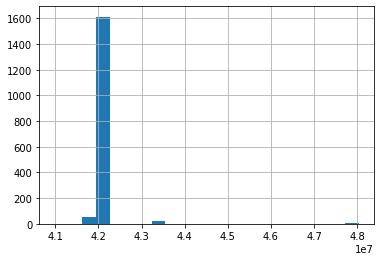

In [11]:
# 동일한 값이 여러개 나오는 듯 하다.  -> 보통 둘쓕 날쑥해야 되는거 아닌가? 정규분포 모양처럼...?

# 히스토그램 
import seaborn as sns
total_internal_df['used_memory_rss'].hist(bins=22)
plt.show()
# # 상자그림
# sns.boxplot(data = total_internal_df, x='used_memory_rss')

In [12]:
index1 = total_internal_df['used_memory_rss'] < 43000000
t1 = total_internal_df['used_memory_rss'][index1]
index2 = t1 >= 42000000
t2 = t1[index2]
# t3 = np.log(t2)
# sns.boxplot(data = t2)
internal0_index = t2.index

<AxesSubplot:xlabel='used_memory_rss', ylabel='Count'>

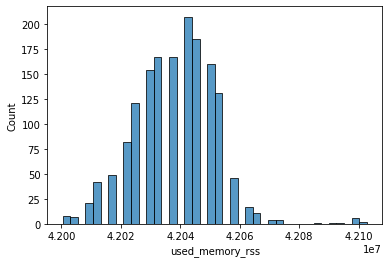

In [13]:
sns.histplot(t2, bins=40)

In [14]:
def get_outlier(df=None, column=None, weight=1.5):
    
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=total_internal_df, column='used_memory_rss', weight=1.5)
t4 = total_internal_df.drop(outlier_idx, axis=0)


<AxesSubplot:xlabel='used_memory_rss', ylabel='Count'>

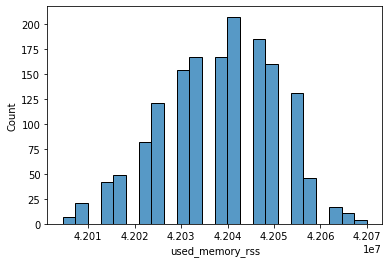

In [15]:
sns.histplot(t4['used_memory_rss'])

<AxesSubplot:xlabel='used_memory_rss'>

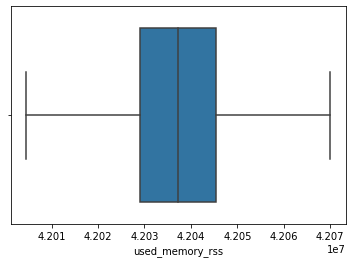

In [16]:
sns.boxplot(data = t4, x='used_memory_rss')

In [17]:
# maxmemory 처리 throughtput은 처리할 필요없다.
total_internal_df['maxmemory']

0       1887436800
1       2202009600
2       2831155200
3       1677721600
4       2516582400
           ...    
1695    2411724800
1696    2516582400
1697    3040870400
1698    2202009600
1699    1887436800
Name: maxmemory, Length: 1700, dtype: int64

In [18]:
# maxmemory 처리 knob
knobs['maxmemory'] = knobs['maxmemory'].str.strip('mb')  # 단위 자르기
knobs['maxmemory'] = pd.to_numeric(knobs['maxmemory'])  # 숫자형으로 바꾸기

### activedefrag 처리
* subTotal_knobs_Active : 약 1300개 이며 activedefrag가 있는 경우 
* subTotal_knobs_NoActive: 약 1300개 이며 activedefrag가 nan값으로 제거한 경우
* subTotal_knobs_T : 2500개 이며 activedefrag 상관없이 전체 데이터


* total_internal_Active : 약 1300개 이며 activedefrag가 있는 경우 
* total_internal_NoActive: 약 1300개 이며 activedefrag가 nan값으로 제거한 경우
* total_internal_T : 2500개 이며 activedefrag 상관없이 전체 데이터

In [19]:
# knob_list 만 추출, AOF 관련 제외
subTotal_knobs = extract_data(knob_list, knobs)

In [20]:
# activedefrag knobs 분리

# activedefrag O 존재
subTotal_knobs_Active = subTotal_knobs.dropna()
Active_index = list(subTotal_knobs_Active.index)  # 인덱스

# activedefrag X 존재하지 않는 나머지 반
subTotal_knobs_NoActive = subTotal_knobs.loc[subTotal_knobs['activedefrag'].isna()].dropna(axis=1)
NoActive_index = list(subTotal_knobs_NoActive.index)  # 인덱스

# activedefrag O and X 전체 
subTotal_knobs_T = subTotal_knobs.dropna(axis=1)
total_index = list(subTotal_knobs_T.index)   # 인덱스

In [21]:
# knobs에서 타입별로 분리 (수치, 불리언, 불리언아닌 문자)

def varType(subTotal_knobs):
    object_var = []
    numerical_var = []  # 문자, 숫자 타입
    
    for idx in subTotal_knobs.dtypes.index:
        if subTotal_knobs.dtypes[idx] == 'O':  # 문자일 경우
            object_var.append(idx)
        else: 
            numerical_var.append(idx)  # 숫자일 경우

    boolean_var = []
    booleanNo_var = []  # 2개, 2개이상

    for col in object_var:
        col_count = len(subTotal_knobs[col].unique())

        if col_count == 2:  # 2개일 경우
            boolean_var.append(col)
        elif col_count > 2:  # 2개 이상일 경우
            booleanNo_var.append(col)
    
    return numerical_var, boolean_var, booleanNo_var

# 수치, 불리언, 불리언아닌것 (전체)
numerical_var, boolean_var, NobooleanNo_var = varType(subTotal_knobs_T)

# 수치, 불리언, 불리언아닌것 (activedefrag)
numericalActive_var, booleanActive_var, NobooleanNoActive_var = varType(subTotal_knobs_Active)

# 수치, 불리언, 불리언아닌것 (activedefrag 없는것)
numericalNoActive_var, booleanNoActive_var, NobooleanNoActive_var = varType(subTotal_knobs_NoActive)


In [22]:
# activedefrag O
total_internal_Active = total_internal_df.iloc[Active_index]

# activedefrag X
total_internal_NoActive = total_internal_df.iloc[NoActive_index]

# activedefrag O and X
total_internal_T = total_internal_df.iloc[total_index]

---

## 상관분석 함수

In [23]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau


# knob하나 internal 여러개 상관계수 구하기

# pearson
## 모수 검정
def cal_pearsonr(knobs, internal_df):
    df = pd.DataFrame(columns = ['corr', 'p-value'])
    for internal in internal_df:
        result = pearsonr(knobs, internal_df[internal])
        df.loc[internal] = [result[0], result[1]]
    return df

# kendall
## 변수값 대신 순위로 바꿔서 이용, 비모수 검정
## 샘플사이저 적거나, 데이터 동률이 많을 때 유용
def cal_kendalltau(knobs, internal_df):
    df = pd.DataFrame(columns = ['corr', 'p-value'])
    for internal in internal_df:
        result = kendalltau(knobs, internal_df[internal])
        df.loc[internal] = [result[0], result[1]]
    return df

# 스피어만
## 변수값 대신 순위로 바꿔서 이용, 비모수 검정
## 데이터 내 편차와 에러에 만감하며, 일반적으로 켄달보다 높은 값을 가진다.
def cal_spearmanr(knobs, internal_df):
    df = pd.DataFrame(columns = ['corr', 'p-value'])
    for internal in internal_df:
        result = spearmanr(knobs, internal_df[internal])
        df.loc[internal] = [result[0], result[1]]
    return df


In [24]:
# knob 하나별로 3가지 상관분석 수행
def extract_pvalue(knobs, internal_df):
    print('pearson')
    df = cal_pearsonr(knobs, internal_df)
    is_pvalue = df['p-value'] <= 0.05
    print(df[is_pvalue])
    print()
    
    print('kendalltau')
    df = cal_kendalltau(knobs, internal_df)
    is_pvalue = df['p-value'] <= 0.05
    print(df[is_pvalue])
    print()
    
    print('spearman')
    df = cal_spearmanr(knobs, internal_df)
    is_pvalue = df['p-value'] <= 0.05
    print(df[is_pvalue])
    print()

# knob 리스트 각각 별로 extract_pvalue 수행
def extract_pvalue_knob(knob_list, subTotal_knobs, total_internal):
    for knob in knob_list:
        print('###{}###'.format(knob))
        extract_pvalue(subTotal_knobs[knob], total_internal)

---

## activedefrag 상관계수
* subTotal_knobs_Active
* total_internal_Active

### numericalActive_var :
* active-defrag-threshold-lower 
* active-defrag-threshold-upper 
* active-defrag-cycle-min
* active-defrag-cycle-max

In [25]:
numericalActive_var
numericalActive_var_new = numericalActive_var[6:10]
numericalActive_var_new

['active-defrag-threshold-lower',
 'active-defrag-threshold-upper',
 'active-defrag-cycle-min',
 'active-defrag-cycle-max']

In [26]:
extract_pvalue_knob(numericalActive_var_new, subTotal_knobs_Active,total_internal_Active)

###active-defrag-threshold-lower###
pearson
Empty DataFrame
Columns: [corr, p-value]
Index: []

kendalltau
Empty DataFrame
Columns: [corr, p-value]
Index: []

spearman
Empty DataFrame
Columns: [corr, p-value]
Index: []

###active-defrag-threshold-upper###
pearson
Empty DataFrame
Columns: [corr, p-value]
Index: []

kendalltau
Empty DataFrame
Columns: [corr, p-value]
Index: []

spearman
Empty DataFrame
Columns: [corr, p-value]
Index: []

###active-defrag-cycle-min###
pearson
                               corr   p-value
uptime_in_seconds         -0.079491  0.021451
instantaneous_ops_per_sec  0.074893  0.030272
instantaneous_input_kbps   0.074893  0.030271
instantaneous_output_kbps  0.074902  0.030252

kendalltau
                               corr   p-value
uptime_in_seconds         -0.095127  0.000771
used_cpu_sys              -0.049000  0.044113
instantaneous_ops_per_sec  0.052079  0.032403
instantaneous_input_kbps   0.052067  0.032443
instantaneous_output_kbps  0.052327  0.031594

spe

In [27]:
# cluster 별 knob들의 상관계수 합  
active_result = pd.DataFrame(index = numericalActive_var_new)

cluster_list = [cluster0, cluster1, cluster2, cluster3]

for idx, cluster in enumerate(cluster_list):
    cluster_val = []
    for knob in numericalActive_var_new:
        df = cal_pearsonr(subTotal_knobs_Active[knob], total_internal_Active.loc[:,cluster])
        cluster_val.append(df['corr'].abs().mean())

    active_result['cluster'+str(idx)] = cluster_val

In [28]:
active_result

,cluster0,cluster1,cluster2,cluster3
active-defrag-threshold-lower,0.011588,0.029782,0.023867,0.000582
active-defrag-threshold-upper,0.026467,0.021809,0.041573,0.012553
active-defrag-cycle-min,0.005875,0.037045,0.041316,0.008671
active-defrag-cycle-max,0.014225,0.037818,0.021834,0.008667


In [29]:
active_result

,cluster0,cluster1,cluster2,cluster3
active-defrag-threshold-lower,0.011588,0.029782,0.023867,0.000582
active-defrag-threshold-upper,0.026467,0.021809,0.041573,0.012553
active-defrag-cycle-min,0.005875,0.037045,0.041316,0.008671
active-defrag-cycle-max,0.014225,0.037818,0.021834,0.008667


---

## 전체 knob
* subTotal_knobs_T
* total_internal_T

### numerical_var

In [30]:
numerical_var

['save0_0',
 'save0_1',
 'save1_0',
 'save1_1',
 'save2_0',
 'save2_1',
 'maxmemory',
 'maxmemory-samples',
 'hash-max-ziplist-entries',
 'hash-max-ziplist-value',
 'hz']

In [31]:
extract_pvalue_knob(numerical_var, subTotal_knobs_T,total_internal_T)

###save0_0###
pearson
                       corr   p-value
uptime_in_seconds -0.048550  0.045341
used_cpu_sys      -0.050629  0.036861

kendalltau
Empty DataFrame
Columns: [corr, p-value]
Index: []

spearman
Empty DataFrame
Columns: [corr, p-value]
Index: []

###save0_1###
pearson
Empty DataFrame
Columns: [corr, p-value]
Index: []

kendalltau
                   corr   p-value
used_cpu_user -0.041212  0.027503

spearman
                   corr   p-value
used_cpu_user -0.053356  0.027816

###save1_0###
pearson
Empty DataFrame
Columns: [corr, p-value]
Index: []

kendalltau
Empty DataFrame
Columns: [corr, p-value]
Index: []

spearman
Empty DataFrame
Columns: [corr, p-value]
Index: []

###save1_1###
pearson
Empty DataFrame
Columns: [corr, p-value]
Index: []

kendalltau
                             corr   p-value
mem_fragmentation_ratio  0.039758  0.047425

spearman
                             corr   p-value
mem_fragmentation_ratio  0.048072  0.047509

###save2_0###
pearson
Empty DataFrame

In [32]:
# cluster 별 knob들의 상관계수 합  
numerical_result = pd.DataFrame(index = numerical_var)

cluster_list = [cluster0, cluster1, cluster2, cluster3]

for idx, cluster in enumerate(cluster_list):
    cluster_val = []
    for knob in numerical_var:
        df = cal_spearmanr(subTotal_knobs_T[knob], total_internal_T.loc[:,cluster])
        cluster_val.append(df['corr'].abs().mean())

    numerical_result['cluster'+str(idx)] = cluster_val

In [33]:
numerical_result

,cluster0,cluster1,cluster2,cluster3
save0_0,0.016581,0.019750,0.015141,0.019965
save0_1,0.031612,0.018152,0.010100,0.011637
save1_0,0.008737,0.016567,0.008731,0.008228
save1_1,0.023269,0.027022,0.013835,0.008840
save2_0,0.025457,0.014749,0.007180,0.019713
save2_1,0.018830,0.016769,0.020865,0.014701
maxmemory,0.014224,0.022491,0.014605,0.008972
maxmemory-samples,0.018019,0.019869,0.017244,0.039725
hash-max-ziplist-entries,0.030972,0.017642,0.013059,0.010935
hash-max-ziplist-value,0.010711,0.013281,0.034982,0.016914


In [34]:
numerical_result

,cluster0,cluster1,cluster2,cluster3
save0_0,0.016581,0.019750,0.015141,0.019965
save0_1,0.031612,0.018152,0.010100,0.011637
save1_0,0.008737,0.016567,0.008731,0.008228
save1_1,0.023269,0.027022,0.013835,0.008840
save2_0,0.025457,0.014749,0.007180,0.019713
save2_1,0.018830,0.016769,0.020865,0.014701
maxmemory,0.014224,0.022491,0.014605,0.008972
maxmemory-samples,0.018019,0.019869,0.017244,0.039725
hash-max-ziplist-entries,0.030972,0.017642,0.013059,0.010935
hash-max-ziplist-value,0.010711,0.013281,0.034982,0.016914


---

## Activedefrag 없는 knob들
* subTotal_knobs_Active
* total_internal_Active
active인거는 신경 안써도 된다.
### numericalActive_var

In [35]:
numericalActive_var

['save0_0',
 'save0_1',
 'save1_0',
 'save1_1',
 'save2_0',
 'save2_1',
 'active-defrag-threshold-lower',
 'active-defrag-threshold-upper',
 'active-defrag-cycle-min',
 'active-defrag-cycle-max',
 'maxmemory',
 'maxmemory-samples',
 'hash-max-ziplist-entries',
 'hash-max-ziplist-value',
 'hz']

In [36]:
extract_pvalue_knob(numericalActive_var, subTotal_knobs_Active,total_internal_Active)

###save0_0###
pearson
                          corr   p-value
uptime_in_seconds    -0.070364  0.041834
allocator_frag_bytes  0.078540  0.023065

kendalltau
Empty DataFrame
Columns: [corr, p-value]
Index: []

spearman
Empty DataFrame
Columns: [corr, p-value]
Index: []

###save0_1###
pearson
Empty DataFrame
Columns: [corr, p-value]
Index: []

kendalltau
Empty DataFrame
Columns: [corr, p-value]
Index: []

spearman
Empty DataFrame
Columns: [corr, p-value]
Index: []

###save1_0###
pearson
Empty DataFrame
Columns: [corr, p-value]
Index: []

kendalltau
Empty DataFrame
Columns: [corr, p-value]
Index: []

spearman
Empty DataFrame
Columns: [corr, p-value]
Index: []

###save1_1###
pearson
                             corr   p-value
used_memory_rss          0.084798  0.014126
used_memory_rss_human    0.084547  0.014415
mem_fragmentation_ratio  0.084997  0.013900
mem_fragmentation_bytes  0.080412  0.019981
total_net_output_bytes  -0.074500  0.031152

kendalltau
                             corr   

## other knob
* subTotal_knobs_NoActive
* total_internal_NoActive
active인거는 신경 안써도 된다.
### numericalNoActive_var

In [37]:
numericalNoActive_var

['save0_0',
 'save0_1',
 'save1_0',
 'save1_1',
 'save2_0',
 'save2_1',
 'active-defrag-threshold-lower',
 'active-defrag-threshold-upper',
 'active-defrag-cycle-min',
 'active-defrag-cycle-max',
 'maxmemory',
 'maxmemory-samples',
 'hash-max-ziplist-entries',
 'hash-max-ziplist-value',
 'hz']

In [38]:
extract_pvalue_knob(numericalNoActive_var, subTotal_knobs_NoActive,total_internal_NoActive)

###save0_0###
pearson


ValueError: x and y must have length at least 2.

---

## pointbiserialr 분석

In [39]:
from scipy.stats import pointbiserialr
# pointbiserialr
## yes,no 데이터와 연속형 데이터 상관분석
def cal_pointbiserialr(knobs, internal_df):
    df = pd.DataFrame(columns = ['corr', 'p-value'])
    for internal in internal_df:
        result = pointbiserialr(knobs, internal_df[internal])
        df.loc[internal] = [result[0], result[1]]
    return df

# knob 하나별로 3가지 상관분석 수행
def extract_pvalue(knobs, internal_df):
    print('pointbierialr')
    df = cal_pointbiserialr(knobs, internal_df)
    is_pvalue = df['p-value'] <= 0.05
    print(df[is_pvalue])
    print()


# knob 리스트 각각 별로 extract_pvalue 수행
def extract_pvalue_knob_point(knob_list, subTotal_knobs, total_internal):
    for knob in knob_list:
        print('###{}###'.format(knob))
        extract_pvalue(subTotal_knobs[knob], total_internal)


## other knob(activedefrag 제외)
* subTotal_knobs_T
* total_internal_T

### boolean_var

In [40]:
boolean_var

['rdbcompression',
 'rdbchecksum',
 'rdb-save-incremental-fsync',
 'activedefrag',
 'lazyfree-lazy-eviction',
 'lazyfree-lazy-expire',
 'lazyfree-lazy-server-del',
 'activerehashing',
 'dynamic-hz']

In [41]:
#  yes, no -> 1, 0으로 변경
subTotal_knobs_T_bool = subTotal_knobs_T[boolean_var]  ## boolean 변수 df 추출
subTotal_knobs_T_point = subTotal_knobs_T_bool.replace(['yes', 'no'], [1,0])  ## 1, 0 변경

In [42]:
extract_pvalue_knob_point(boolean_var, subTotal_knobs_T_point, total_internal_T)

###rdbcompression###
pointbierialr
Empty DataFrame
Columns: [corr, p-value]
Index: []

###rdbchecksum###
pointbierialr
Empty DataFrame
Columns: [corr, p-value]
Index: []

###rdb-save-incremental-fsync###
pointbierialr
Empty DataFrame
Columns: [corr, p-value]
Index: []

###activedefrag###
pointbierialr
Empty DataFrame
Columns: [corr, p-value]
Index: []

###lazyfree-lazy-eviction###
pointbierialr
                             corr   p-value
used_memory_rss          0.067836  0.005140
used_memory_rss_human    0.068062  0.004993
rss_overhead_ratio       0.054217  0.025391
rss_overhead_bytes       0.056122  0.020662
mem_fragmentation_ratio  0.067219  0.005561
mem_fragmentation_bytes  0.066177  0.006342
used_cpu_sys            -0.048853  0.044011
allocator_frag_bytes    -0.049997  0.039282

###lazyfree-lazy-expire###
pointbierialr
                          corr   p-value
allocator_frag_bytes -0.060802  0.012162

###lazyfree-lazy-server-del###
pointbierialr
Empty DataFrame
Columns: [corr, p-va

In [43]:
# cluster 별 knob들의 상관계수 합
bool_result = pd.DataFrame(index = boolean_var)

cluster_list = [cluster0, cluster1, cluster2, cluster3]

for idx, cluster in enumerate(cluster_list):
    cluster_val = []
    for knob in boolean_var:
        df = cal_pointbiserialr(subTotal_knobs_T_point[knob], total_internal_T.loc[:,cluster])
        cluster_val.append(df['corr'].abs().mean())

    bool_result['cluster'+str(idx)] = cluster_val

In [ ]:
bool_result

In [ ]:
bool_result

---

In [ ]:
extract_pvalue_knob(numerical_var, subTotal_knobs_T,total_internal_T)
extract_pvalue_knob(numericalActive_var_new, subTotal_knobs_Active,total_internal_Active)
extract_pvalue_knob_point(boolean_var, subTotal_knobs_T_point, total_internal_T)